# Social Network Analysis of Meetup Network

## Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import pylab as plt 
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

## Reading Member-Member data

In [2]:
member_edges = pd.read_csv('member-edges.csv')
member_meta = pd.read_csv('meta-members.csv')

In [3]:
len(member_meta)

24591

In [4]:
member_edges.head()

,Unnamed: 0,member1,member2,weight
0,0,198737924,220654721,1
1,1,198737924,208201738,1
2,2,198737924,88664332,1
3,3,198737924,8640526,1
4,4,198737924,56356372,1


In [5]:
member_meta.head()

,member_id,name,hometown,city,state,lat,lon
0,2069,Wesley Duffee-Braun,Brentwood,Brentwood,TN,36.00,-86.79
1,8386,Tim,Nashville,Nashville,TN,36.07,-86.78
2,9205,Brenda,Brentwood,Brentwood,TN,36.00,-86.79
3,17903,Steve,NaN,Nashville,TN,36.13,-86.80
4,20418,Andrea Reynolds,"Huntington, WV",Nashville,TN,36.17,-86.72


In [6]:
G = nx.path_graph(member_edges)
print(nx.is_connected(G))

True


### Display of the member data with number of nodes and edges

In [7]:
no_of_nodes_edges = nx.from_pandas_edgelist(member_edges, 'member1', 'member2', 'weight')
print('Number of nodes is:', len(no_of_nodes_edges.nodes))
print('Number of edges is:', len(no_of_nodes_edges.edges))

Number of nodes is: 11372
Number of edges is: 1176368


## Taking Subset of data from the original dataset for the member file

In [8]:
member_edges_subset = member_edges[0:8000]

In [9]:
G_nodes = nx.from_pandas_edgelist(member_edges_subset, 'member1', 'member2', 'weight')
print('Number of nodes is:', len(G_nodes.nodes))
print('Number of edges is:', len(G_nodes.edges))

Number of nodes is: 4866
Number of edges is: 8000


## Network Visualization of Member data

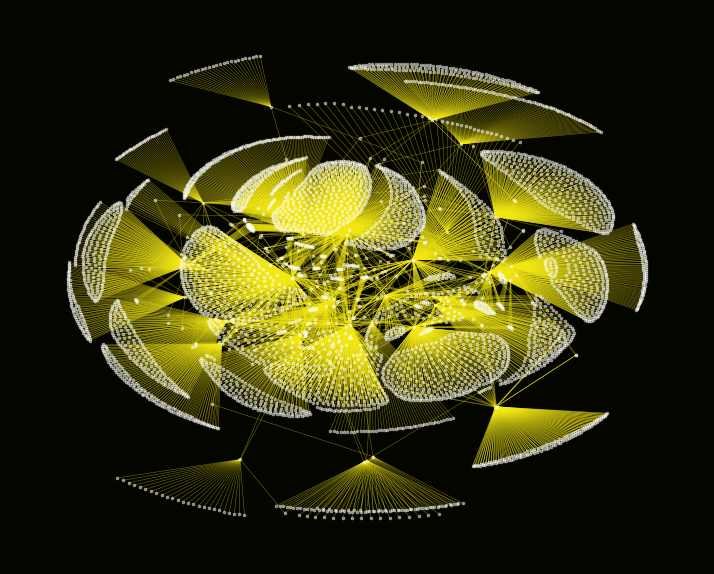

In [10]:
pd.set_option('precision', 10)
G = nx.from_pandas_edgelist(member_edges_subset, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.summer
cmap = plt.cm.spring

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (10,8), dpi=70)

nx.draw(G,pos,alpha = 0.5, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 2,
        width = 0.5, cmap = cmap, edge_color ='#f5ea16')
fig.set_facecolor('#050500')

plt.show()

### Finding the degree of each node from member_edges data

In [11]:
for i in sorted(G_nodes.nodes()):
    G_nodes.nodes[i]['degree'] = G_nodes.degree(i)

node_degree = pd.DataFrame([i[1] for i in G_nodes.nodes(data=True)], index=[i[0] for i in G_nodes.nodes(data=True)])
node_degree = node_degree.sort_values(by='degree',ascending= False)
node_degree.index.names=['Actor']
node_degree.reset_index(level=0, inplace=True)

In [12]:
node_degree.head()

,Actor,degree
0,195657825,806
1,204669023,577
2,6160486,487
3,205193250,441
4,25034832,399


In [13]:
df_centrality_bet = nx.betweenness_centrality(G_nodes)
df_centrality_between = pd.DataFrame.from_dict(df_centrality_bet, orient='index')
df_centrality_between.columns = ['betweenness_centrality']
df_centrality_between.index.names = ['Actor']
df_centrality_between.reset_index(level=0, inplace=True)
centrality_data = pd.merge(node_degree,df_centrality_between, on = ['Actor'])

In [14]:
centrality_closeness = nx.closeness_centrality(G_nodes)
df_centrality_closeness = pd.DataFrame.from_dict(centrality_closeness, orient='index')
df_centrality_closeness.columns = ['closeness_centrality']
df_centrality_closeness.index.names = ['Actor']
df_centrality_closeness.reset_index(level=0, inplace=True)
centrality_data= pd.merge(centrality_data, df_centrality_closeness, on = ['Actor'])

In [15]:
centrality_eigen = nx.eigenvector_centrality_numpy(G_nodes)
df_centrality_eigen = pd.DataFrame.from_dict(centrality_eigen, orient='index')
df_centrality_eigen.columns = ['eigenvector_centrality']
df_centrality_eigen.index.names = ['Actor']
df_centrality_eigen.reset_index(level=0, inplace=True)
centrality_data= pd.merge(centrality_data, df_centrality_eigen, on = ['Actor'])

In [16]:
degree_centrality = nx.degree_centrality(G_nodes)
df_centrality_degree = pd.DataFrame.from_dict(degree_centrality, orient='index')
df_centrality_degree.columns = ['degree_centrality']
df_centrality_degree.index.names = ['Actor']
df_centrality_degree.reset_index(level=0, inplace=True)
centrality_data= pd.merge(centrality_data, df_centrality_degree, on = ['Actor'])

In [17]:
centrality_data.head()

,Actor,degree,betweenness_centrality,closeness_centrality,eigenvector_centrality,degree_centrality
0,195657825,806,0.2474418904,0.3654597356,0.4607638953,0.1656731757
1,204669023,577,0.1166818323,0.3631138976,0.4022106239,0.1186022610
2,6160486,487,0.1851549561,0.3373786408,0.0028795535,0.1001027749
3,205193250,441,0.0454032000,0.3528430519,0.3564987069,0.0906474820
4,25034832,399,0.0738672805,0.3290942299,0.0302249564,0.0820143885


### Top centered people based on Degree Centrality 

In [18]:
print('The most centered people in the network based on degree_centrality are:')
centrality_data.sort_values(by='degree_centrality', ascending=False)[['Actor', 'degree_centrality']][:5]

The most centered people in the network based on degree_centrality are:


,Actor,degree_centrality
0,195657825,0.1656731757
1,204669023,0.1186022610
2,6160486,0.1001027749
3,205193250,0.0906474820
4,25034832,0.0820143885


In [19]:
degree_top_list = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print(degree_top_list)

[195657825, 204669023, 6160486, 205193250, 25034832, 209453152, 234684445, 226754592, 115965992, 182190122]


### Top centered people based on Betweenness Centrality

In [20]:
print('The most centered people in the network based on betweenness_centrality are:')
centrality_data.sort_values(by='betweenness_centrality', ascending=False)[['Actor', 'betweenness_centrality']][:5]

The most centered people in the network based on betweenness_centrality are:


,Actor,betweenness_centrality
0,195657825,0.2474418904
2,6160486,0.1851549561
6,234684445,0.1339820446
7,226754592,0.1314246971
1,204669023,0.1166818323


In [21]:
bet_top_list = sorted(df_centrality_bet, key=df_centrality_bet.get, reverse=True)[:10]
print(bet_top_list)

[195657825, 6160486, 234684445, 226754592, 204669023, 198574124, 101056562, 217350178, 25034832, 209453152]


### Top centered people based on Closeness Centrality

In [23]:
print('The most centered people in the network based on closeness_centrality are:')
centrality_data.sort_values(by='closeness_centrality', ascending=False)[['Actor', 'closeness_centrality']][:5]

The most centered people in the network based on closeness_centrality are:


,Actor,closeness_centrality
0,195657825,0.3654597356
1,204669023,0.3631138976
3,205193250,0.3528430519
2,6160486,0.3373786408
18,187334729,0.3307498810


In [24]:
close_top_list = sorted(centrality_closeness, key=centrality_closeness.get, reverse=True)[:10]
print(close_top_list)

[195657825, 204669023, 205193250, 6160486, 187334729, 25034832, 209453152, 217350178, 115965992, 182190122]


### Top centered people based on Eigenvector Centrality

In [25]:
print('The most centered people in the network based on eigenvector_centrality are:')
centrality_data.sort_values(by='eigenvector_centrality', ascending=False)[['Actor', 'eigenvector_centrality']][:5]

The most centered people in the network based on eigenvector_centrality are:


,Actor,eigenvector_centrality
0,195657825,0.4607638953
1,204669023,0.4022106239
3,205193250,0.3564987069
8,115965992,0.0650050446
23,34340942,0.0571430106


In [26]:
eigen_top_list = sorted(centrality_eigen, key=centrality_eigen.get, reverse=True)[:10]
print(eigen_top_list)

[195657825, 204669023, 205193250, 115965992, 34340942, 3380276, 59892862, 175300482, 189528179, 188671296]


## Network Visualization of Degree Centrality

[195657825, 204669023, 6160486, 205193250, 25034832]

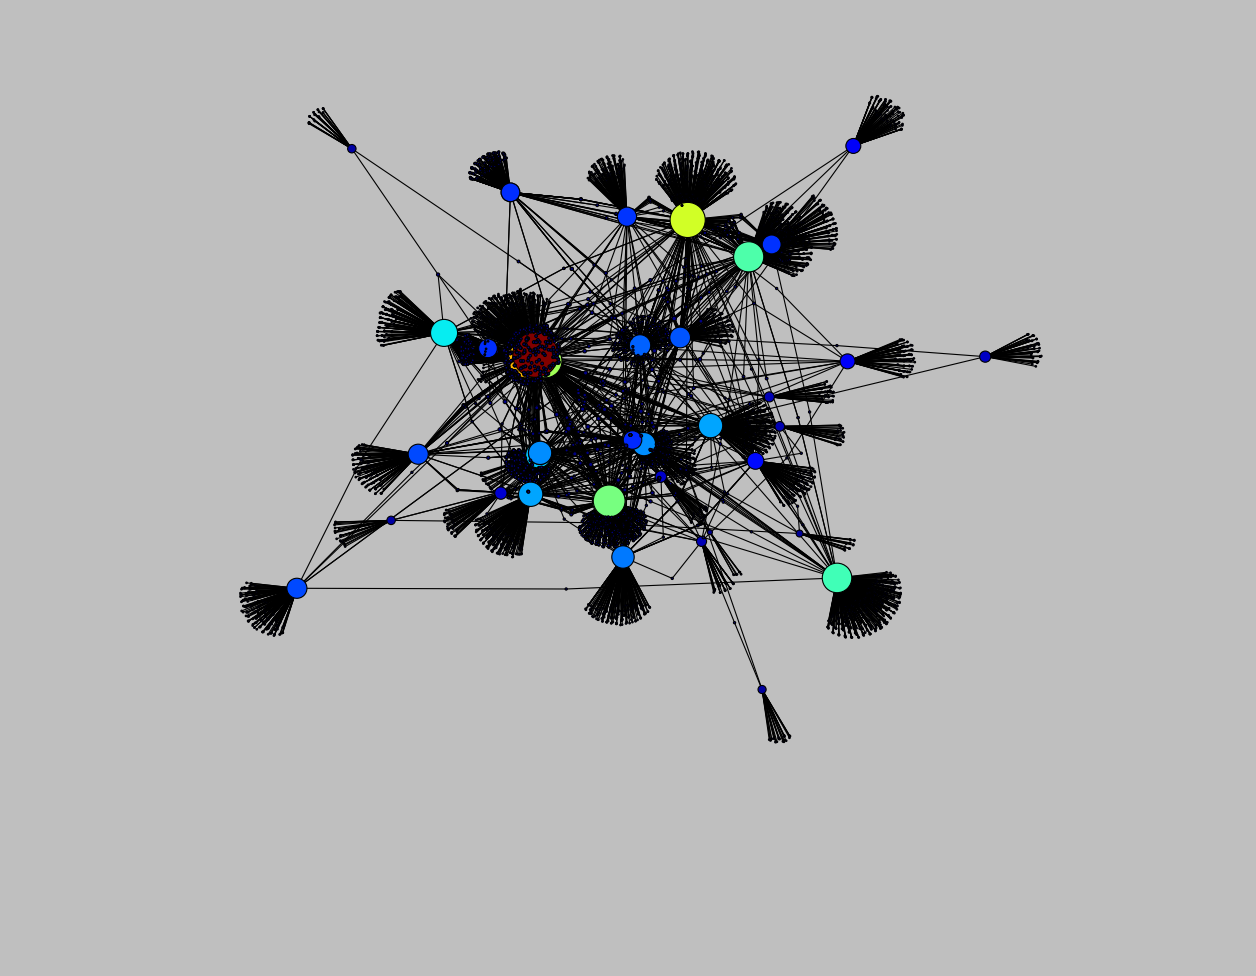

In [27]:
pos = nx.spring_layout(G_nodes)
node_color = [20000.0 * G_nodes.degree(v) for v in G_nodes]
node_size =  [v * 10000 for v in degree_centrality.values()]
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (20, 15)
nx.draw_networkx(G_nodes, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

## Network Visualization of Betweenness Centraltity

In [8]:
pos = nx.kamada_kawai_layout(G_nodes)
node_color = [20000.0 * G_nodes.degree(v) for v in G_nodes]
node_size =  [v * 10000 for v in df_centrality_bet.values()]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
nx.draw_networkx(G_nodes, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(df_centrality_bet, key=df_centrality_bet.get, reverse=True)[:5]

NameError: name 'G_nodes' is not defined

## Network Visualization of Closeness Centrality

In [9]:
pos = nx.spring_layout(G_nodes)
node_color = [20000.0 * G_nodes.degree(v) for v in G_nodes]
node_size =  [v * 1000 for v in centrality_closeness.values()]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
nx.draw_networkx(G_nodes, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(centrality_closeness, key=centrality_closeness.get, reverse=True)[:5]

NameError: name 'G_nodes' is not defined

## Network Visualization of Eigenvector Centrality 

In [10]:
pos = nx.spring_layout(G_nodes)
node_color = [20000.0 * G_nodes.degree(v) for v in G_nodes]
node_size =  [v * 10000 for v in centrality_eigen.values()]
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (20, 15)
nx.draw_networkx(G_nodes, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(centrality_eigen, key=centrality_eigen.get, reverse=True)[:5]

NameError: name 'G_nodes' is not defined

# Group data analysis with Group_edges and group_meta

In [11]:
group_edges = pd.read_csv('group-edges.csv')
group_meta = pd.read_csv('meta-groups.csv', index_col='group_id')

In [12]:
G1 = nx.path_graph(group_edges)
print(nx.is_connected(G1))

True


In [13]:
group_edges.head()

,Unnamed: 0,group1,group2,weight
0,0,19292162,535553,2
1,1,19292162,19194894,1
2,2,19292162,19728145,1
3,3,19292162,18850080,2
4,4,19292162,1728035,1


In [14]:
group_meta.head()

,group_name,num_members,category_id,category_name,organizer_id,group_urlname
group_id,,,,,,
339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking
19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer
10016242,NashJS,1975,34,Tech,8111102,nashjs
21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville


## Number of nodes and edges in the gruop data

In [15]:
group_data = nx.from_pandas_edgelist(group_edges, 'group1', 'group2', 'weight')
print('Number of nodes is:', len(group_data.nodes))
print('Number of edges is:', len(group_data.edges))
print('Number of groups with group_mata data:', len(group_meta))

Number of nodes is: 456
Number of edges is: 6692
Number of groups with group_mata data: 602


In [16]:
# Matching the group_meta data with original group_edges data 
group_data_member = group_meta.loc[[i for i in group_data.nodes]]
print('Number of groups matching with the group_edges:', len(group_data_member))

Number of groups matching with the group_edges: 456


## Network visualization of Group data 

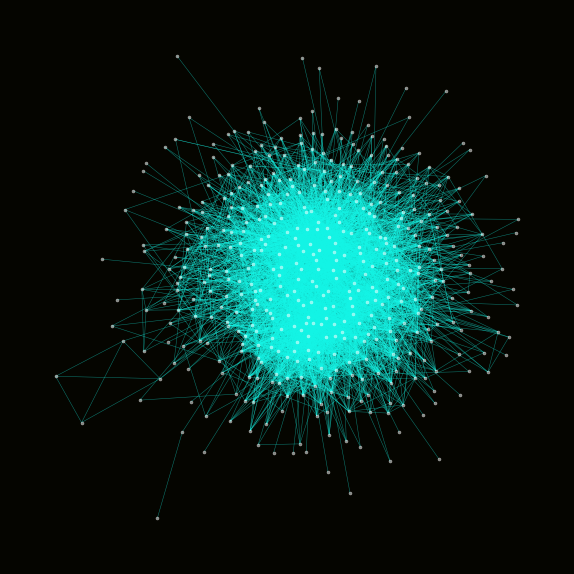

In [17]:
pd.set_option('precision', 10)
G = nx.from_pandas_edgelist(group_edges, 'group1', 'group2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.summer
cmap = plt.cm.spring

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (8,8), dpi=70)

nx.draw(G,pos,alpha = 0.5, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 2,
        width = 0.5, cmap = cmap, edge_color ='#16f7e8')
fig.set_facecolor('#050500')

plt.show()

## Finding the Centrality measures amoung the groups 

In [18]:
group_data_member['degree'] = pd.Series(dict(nx.degree(group_data)))
group_data_member['degree_centrality'] = pd.Series(dict(nx.degree_centrality(group_data)))
group_data_member['clustering'] = pd.Series(nx.clustering(group_data))
group_data_member['betweenness_centrality'] = pd.Series(nx.betweenness_centrality(group_data, weight='weight'))

In [19]:
group_data_member.head()

,group_name,num_members,category_id,category_name,organizer_id,group_urlname,degree,degree_centrality,clustering,betweenness_centrality
group_id,,,,,,,,,,
19292162,Nashville CocoaHeads,237,34,Tech,145632652,Nashville-CocoaHeads,37,0.0813186813,0.6921921922,0.0007288935
535553,Nash.rb,881,34,Tech,14344641,nashrb,65,0.1428571429,0.5596153846,0.0035550069
19194894,Nashville Christian Technologists and Entrepre...,613,34,Tech,193181718,Nashville-Christian-Technologists-and-Entrepre...,55,0.1208791209,0.5616161616,0.0024876103
19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance,182,0.4000000000,0.1716349948,0.0436978069
18850080,NashReact,438,34,Tech,10083866,NashReact-Meetup,55,0.1208791209,0.6020202020,0.0014342851


## Largest groups in the group data 

In [20]:
most_member_groups = group_data_member.sort_values(by='num_members', ascending=False)[['group_name', 'num_members']][:10] 
most_member_groups

,group_name,num_members
group_id,,
339011,Nashville Hiking Meetup,15838
929402,Paddle Adventures Unlimited,6331
18955830,Eat Love Nash,5008
1585196,Tennessee Hiking Group,4828
1102353,Nashville Backpacker Meetup,3861
18506072,20s in Nashville,3811
1396244,Live Music Metropolis - Nashville Chapter,3765
6928642,Middle Tennessee Sierra Club Outings and Adven...,3509
526316,¡Diablos Que Bailan! (Salsa Nashville),3472


### Most central groups in the group data network.

In [21]:
print('The ten most central groups in the network based on Degree centrality are:')
most_degree_groups = group_data_member.sort_values(by='degree_centrality', ascending=False).group_name[:10]                    
most_degree_groups

The ten most central groups in the network based on Degree centrality are:


group_id
19728145                     Stepping Out Social Dance Meetup
18955830                                        Eat Love Nash
1187715                                         What the Pho!
18506072                                     20s in Nashville
339011                                Nashville Hiking Meetup
4126912                        Nashville Online Entrepreneurs
18243826                                Middle TN 40+ singles
1776274     Nashville SEO & Internet Marketing, Over 1,600...
11077852                            Sunday Assembly Nashville
16487812                                   Code for Nashville
Name: group_name, dtype: object

## Network Visualization of Group Network with Degree Centrality

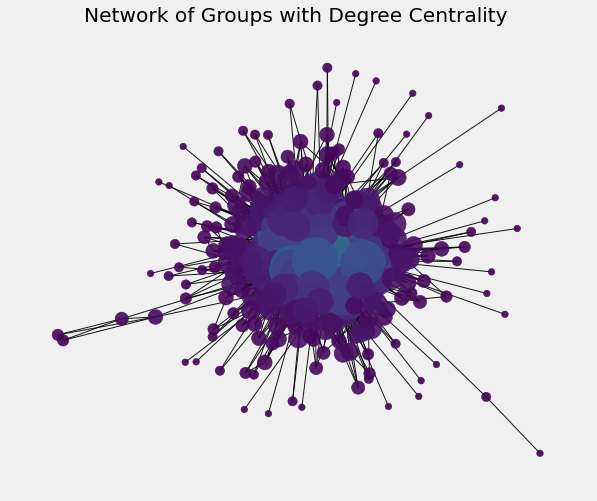

In [22]:
pos = nx.spring_layout(group_data)       
node_color = [50000.0 * group_data.degree(v) for v in group_data]
node_size =  [v * 20000 for v in group_data_member['degree_centrality']]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
nx.draw_networkx(group_data, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.9)
plt.axis('off')
sorted(group_data_member['degree_centrality'], reverse=True)[:5]

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Network of Groups with Degree Centrality ')
plt.show()

In [23]:
print('The ten most central groups in the network based on centrality are:')
most_cental_groups = group_data_member.sort_values(by='betweenness_centrality', ascending=False).group_name[:10]                    
most_cental_groups

The ten most central groups in the network based on centrality are:


group_id
19728145          Stepping Out Social Dance Meetup
1187715                              What the Pho!
18243826                     Middle TN 40+ singles
18955830                             Eat Love Nash
19266390    Nashville Networking Business Luncheon
339011                     Nashville Hiking Meetup
18506072                          20s in Nashville
11077852                 Sunday Assembly Nashville
4126912             Nashville Online Entrepreneurs
1585196                     Tennessee Hiking Group
Name: group_name, dtype: object

## Network Visualization of Group Network with Betweenness Centrality

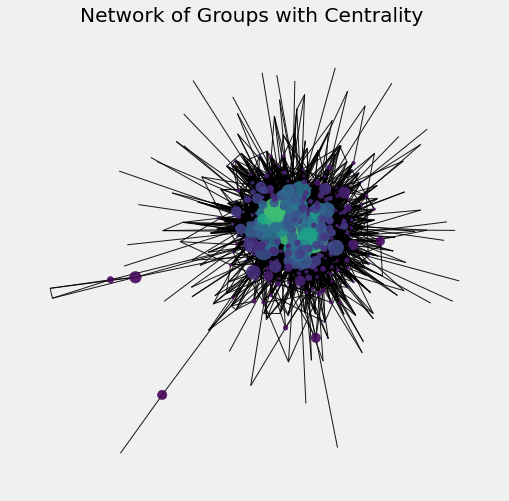

In [24]:
pos = nx.spring_layout(group_data)       
node_color = [50000.0 * group_data.degree(v) for v in group_data]
node_size =  [v * 20000 for v in group_data_member['betweenness_centrality']]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
nx.draw_networkx(group_data, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.9)
plt.axis('off')
sorted(group_data_member['betweenness_centrality'], reverse=True)[:5]

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Network of Groups with Centrality ')
plt.show()

In [25]:
print('The ten most clustered groups in the network based on clustering are:')
most_clustered_groups = group_data_member.sort_values(by='clustering', ascending=False).group_name[:10]                  
most_clustered_groups

The ten most clustered groups in the network based on clustering are:


group_id
25718653                       Nashville Hookah Bar Hook-ups!
22468329                                         Man Cave 615
16321082                        Nashville Cloudera User Group
24811380    Marigolds Author Group + Travel Club for Chris...
14775182                              Nashville Travel Meetup
24619540                               East Nashville YA Lit!
18665368           Second Saturday Divorce Workshop for Women
21262880              Amway Business Opportunity Info Session
20780059                                    Movies with Heide
24744100                           Nashville Instagram Meetup
Name: group_name, dtype: object

## Network Visualization of Group Network with Clustering Centrality

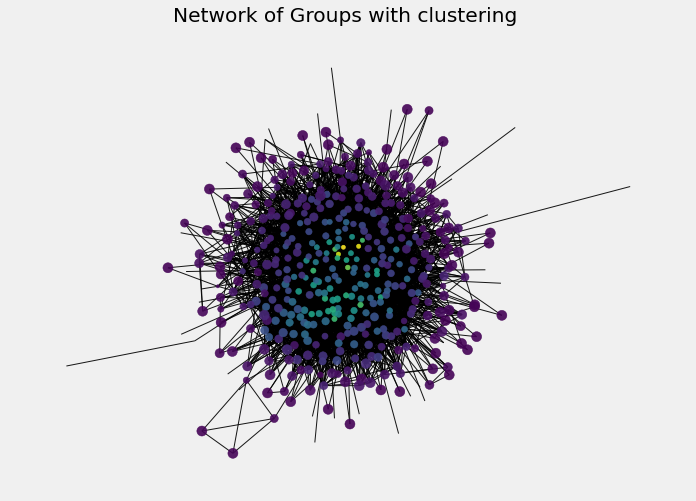

In [26]:
pos = nx.kamada_kawai_layout(group_data)       
node_color = [50000.0 * group_data.degree(v) for v in group_data]
node_size =  [v * 100 for v in group_data_member['clustering']]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
nx.draw_networkx(group_data, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size, alpha=0.9)
plt.axis('off')
sorted(group_data_member['clustering'], reverse=True)[:5]

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Network of Groups with clustering ')
plt.show()

## Group analysis for the with the group_data 

In [27]:
len(groups_unique_names)

NameError: name 'groups_unique_names' is not defined

In [ ]:
groups_unique_names = group_meta['category_name'].unique()
print(groups_unique_names)
print(' ')
large_group = group_meta[group_meta['category_name'] == 'Tech']
print('largest group in the network of group_data is:',len(large_group))

In [ ]:
Tech_group = group_meta.loc[group_meta.category_name == 'Tech']
print('Number of tech groups with metadata.',Tech_group.shape[0])

In [ ]:
Group_tech = group_data.subgraph(Tech_group.index)
G_tech = [Group_tech.subgraph(i) for i in nx.connected_components(Group_tech)][0]
tech_group_cat = Tech_group.loc[(node for node in G_tech.nodes)]
print('Total number of Tech groups after matching the dataset with meta data:', len(tech_group_cat))

In [ ]:
tech_group_cat.head()

## Largest Groups in the Tech Group

In [ ]:
tech_group_cat.sort_values(by='num_members', ascending=False)[['group_name', 'num_members']][:10]

## Finding the Centrality measures amoung Tech group

In [ ]:
tech_group_cat['degree'] = pd.Series(dict(nx.degree(G_tech)))
tech_group_cat['clustering'] = pd.Series(nx.clustering(G_tech))
tech_group_cat['centrality'] = pd.Series(nx.betweenness_centrality(G_tech))

In [ ]:
tech_group_cat.sort_values(by='centrality', ascending=False)[['group_name', 'centrality']][:10]

## Network Visualization of Tech groups with degree Centrality 

In [ ]:
pos = nx.kamada_kawai_layout(G_tech)
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (10,8), dpi=70)
node_size =  [v for v in tech_group_cat['degree']]
cmap = plt.cm.summer
cmap = plt.cm.spring
nx.draw_networkx(G_tech, pos, with_labels=False, node_size=node_size, width=0.5,cmap = cmap, edge_color ='#16f7e8', node_color = 'r', alpha=0.5)
fig.set_facecolor('#050500')
ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Nashville Tech MeetUps')
plt.show()

## Network Visualization of Tech groups with Betweenness Centrality 

In [ ]:
# plt.figure(dpi=150)

pos = nx.kamada_kawai_layout(G_tech)
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15,10), dpi=70)
node_size =  [v * 20000 for v in tech_group_cat['centrality']]
cmap = plt.cm.summer
cmap = plt.cm.spring
nx.draw_networkx(G_tech, pos, with_labels=False, node_size=node_size, width=0.5,cmap = cmap, edge_color ='yellow', node_color = 'r', alpha=0.5)
fig.set_facecolor('#050500')
ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Nashville Tech MeetUps')
plt.show()

### Communities detection 

Below is the source code for the community detection using Networkx 

In [ ]:
def community_layout(G_tech, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """
    pos_communities = _position_communities(G_tech, partition, scale=3.)
    pos_nodes = _position_nodes(G_tech, partition, scale=1.)

    pos = dict()
    for node in G_tech.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]
    return pos

def _position_communities(G_tech, partition, **kwargs):

    between_community_edges = _find_between_community_edges(G_tech, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(G_tech, partition):

    edges = dict()

    for (ni, nj) in G_tech.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]
    return edges

def _position_nodes(G_tech, partition, **kwargs):
    """
    Positions nodes within communities.
    """
    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]
    pos = dict()
    for ci, nodes in communities.items():
        subgraph = G_tech.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)
    return pos

In [ ]:
import community
partition = community.community_louvain.best_partition(G_tech)
tech_group_cat['community'] = pd.Series(partition)

## Modularity 

In [ ]:
print("Modularity:", community.modularity(partition, G_tech))

## Plotting the Detected Communities

In [ ]:
plt.figure(dpi=150)
pos = community_layout(G_tech, partition)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 10)
cdict = {ii: sns.color_palette()[ii] for ii in set(partition.values())}
nx.draw_networkx(G_tech, pos, node_size=60,node_color=[cdict[ii] for ii in partition.values()],
                 with_labels=True, width=0.15,
                 cmap='rainbow')
plt.axis('off')
plt.show()